<b>Exploratory Data Analysis Examples</b>

O objetivo deste notebook é demonstrar alguns estudos de casos reais, com grande maioria proveniente de cursos realizados ao longo da jornada. Em praticamente todos os casos, um problema de negócio será fornecido e, a partir de Datasets presentes no sistema de arquivos, serão realizados tratamentos específicos no conjunto de dados, preparando e avaliando mellhores maneiras para responder as questões propostas. Entre os principais pontos abordados neste notebook encontram-se:

* Treinamento dos métodos obtidos através dos estudos;
* Aplicação de conceitos teóricos em situações práticas;
* Exploração de conjuntos de dados reais e práticos;
* Análise de problemas através de plotagem de gráficos;
* Etc...

# Complete Conclusion Examples

## Tumor size and malignancy

Analisando novamente o Dataset _cancer-data_, vamos verificar se o tamanho do tumor afeta seu diagnóstico (Benigno ou Maligno). Para tal, utilizaremos todos os conceitos abordados até aqui, incluindo estatísticas descritivas e visualização de dados para tomada de decisão.

In [241]:
import pandas as pd
% matplotlib inline

df_cancer = pd.read_csv('C:/Users/thiagoPanini/Downloads/datasets/cancer_means.csv')
df_cancer.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean
0,M,17.99,19.293431,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,M,20.57,17.770000,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,M,19.69,21.250000,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,M,11.42,20.380000,77.58,386.1,NaN,0.28390,0.2414,0.10520,0.2597,0.09744
4,M,20.29,14.340000,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


Neste caso, o ideal é dividir o Dataset em dois novos Datasets, contemplando aqueles cujo diagnóstico é _Benigno_ e aqueles cujo diagnóstico é _Maligno_. Dessa forma, será possível comparar o atributo _area_ em ambos.

In [242]:
# Split tumores benignos
df_b = df_cancer[df_cancer['diagnosis'] == 'B']
df_b.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean
19,B,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.04781,0.1885,0.05766
20,B,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.03110,0.1967,0.06811
21,B,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.02076,0.1815,0.06905
37,B,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.02923,0.1467,0.05863
40,B,12.670,17.30,81.25,489.9,0.10280,0.07664,0.03193,0.02107,0.1707,0.05984


In [243]:
# Split tumores malignos
df_m = df_cancer[df_cancer['diagnosis'] == 'M']
df_m.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean
0,M,17.99,19.293431,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,M,20.57,17.770000,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,M,19.69,21.250000,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,M,11.42,20.380000,77.58,386.1,NaN,0.28390,0.2414,0.10520,0.2597,0.09744
4,M,20.29,14.340000,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


In [246]:
# Avaliando a coluna area em cada um dos DataFrames
print(f"Área média de tumores Benignos: {df_b['area_mean'].mean():.2f}")
print(f"Área média de tumores Malignos: {df_m['area_mean'].mean():.2f}")

Área média de tumores Benignos: 462.71
Área média de tumores Malignos: 976.58


Já neste instante, é possível perceber que, em média, a área de tumores Malignos são maiores que a área de tumores Benignos. Porém, visualizar isso em forma de gráficos seria muito mais prático. Vejamos.

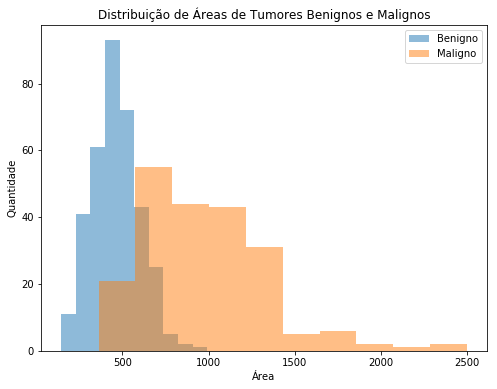

In [247]:
# Utilizando matplotlib
import matplotlib.pyplot as plt
% matplotlib inline

fig, ax = plt.subplots(figsize=(8, 6))
ax.hist(df_b['area_mean'], alpha=0.5, label='Benigno')
ax.hist(df_m['area_mean'], alpha=0.5, label='Maligno')
ax.set_title('Distribuição de Áreas de Tumores Benignos e Malignos')
ax.set_xlabel('Área')
ax.set_ylabel('Quantidade')
ax.legend(loc='upper right')
plt.show()

Extremamente interessante como a distribuição em formato de Histograma nos levou a mesma conclusão. A distribuição de área de tumores Malignos encontram-se com valores maiores que a distribuição de área de tumores Benignos.

## Census income _versus_ age

Neste exemplo, vamos retormar a análise do dataset _census-income-data_ para verificar se os ganhos anuais estão relacionados com algum atributo presente no próprio dataset, como por exemplo, a idade.

In [1]:
# Importando bibliotecas e lendo arquivo
import pandas as pd
% matplotlib inline

df_census = pd.read_csv('C:/Users/thiagoPanini/Downloads/datasets/census_income.csv')
df_census.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


<b>Primeira tarefa:</b> Separar o dataset em dois diferentes DataFrames, o primeiro contendo aqueles cujo atribuo _income_ é inferior ou igual a 50k (<=50k) e, o segundo, com os demais.

In [4]:
# Separando dataset
df_humble = df_census[df_census['income'] == ' <=50K']
df_rich = df_census[df_census['income'] == ' >50K']

In [5]:
# Verificando alterações
df_humble.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [7]:
df_rich.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
10,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K
11,30,State-gov,141297,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,India,>50K


<b>Análise 1:</b> Vamos verificar se os níveis de educação são semelhantes para estes dois DataFrames

In [8]:
# Educação income <=50K
df_humble['education'].value_counts()

 HS-grad         8826
 Some-college    5904
 Bachelors       3134
 11th            1115
 Assoc-voc       1021
 10th             871
 Assoc-acdm       802
 Masters          764
 7th-8th          606
 9th              487
 12th             400
 5th-6th          317
 1st-4th          162
 Prof-school      153
 Doctorate        107
 Preschool         51
Name: education, dtype: int64

In [9]:
# Educação incoma >50K
df_rich['education'].value_counts()

 Bachelors       2221
 HS-grad         1675
 Some-college    1387
 Masters          959
 Prof-school      423
 Assoc-voc        361
 Doctorate        306
 Assoc-acdm       265
 10th              62
 11th              60
 7th-8th           40
 12th              33
 9th               27
 5th-6th           16
 1st-4th            6
Name: education, dtype: int64

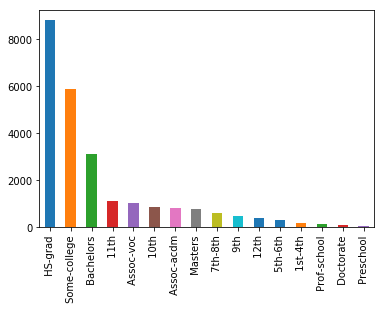

In [11]:
# Visualizando em formato gráfico
df_humble['education'].value_counts().plot(kind='bar');

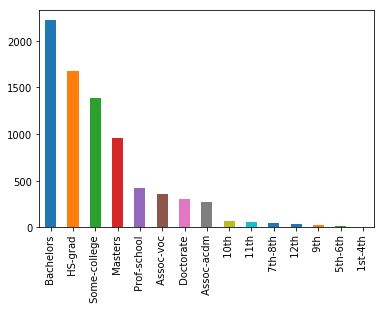

In [12]:
df_rich['education'].value_counts().plot(kind='bar');

Detalhe importante: os índices não são os mesmos! Para uma comparação justa, é necessário fixar os índices nos dois gráficos, para evitar a avaliação 'default' do maior para o menor.

In [14]:
# Mostrando índice do DataFrame humilde
ind = df_humble['education'].value_counts().index
ind

Index([' HS-grad', ' Some-college', ' Bachelors', ' 11th', ' Assoc-voc',
       ' 10th', ' Assoc-acdm', ' Masters', ' 7th-8th', ' 9th', ' 12th',
       ' 5th-6th', ' 1st-4th', ' Prof-school', ' Doctorate', ' Preschool'],
      dtype='object')

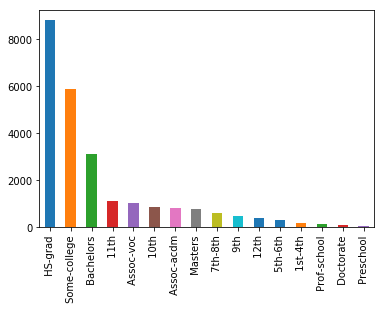

In [15]:
# Refazendo gráficos com índices corretos
df_humble['education'].value_counts()[ind].plot(kind='bar');

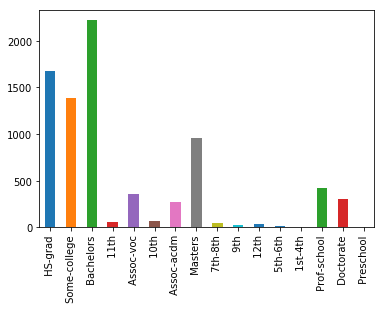

In [16]:
df_rich['education'].value_counts()[ind].plot(kind='bar');

Vamos avaliar agora o resultado em formato de gráfico de <b>Pizza</b> para visualizar as classes (workclass) dominantes em cada grupo.

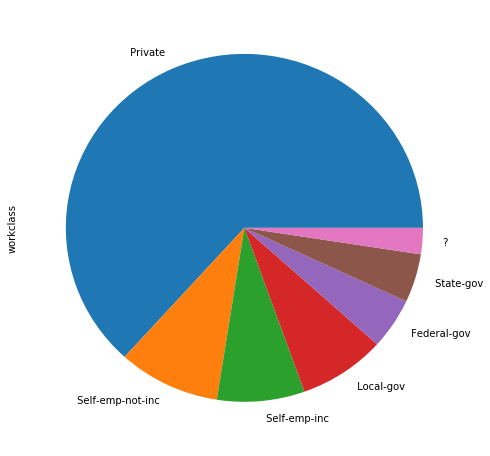

In [21]:
# Setando indice e printando gráfico
ind = df_rich['workclass'].value_counts().index
df_rich['workclass'].value_counts()[ind].plot(kind='pie', figsize=(8, 8));

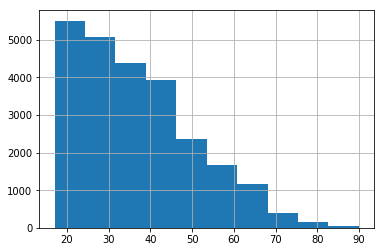

In [22]:
# Visualizando distribuição de idades (histograma)
df_humble['age'].hist();

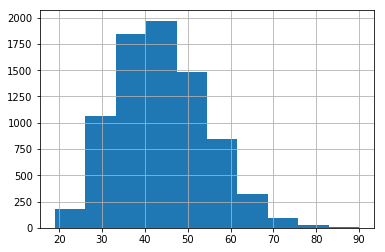

In [23]:
# Ricos
df_rich['age'].hist();

In [24]:
# Comprovando resultados
df_humble['age'].describe()

count    24720.000000
mean        36.783738
std         14.020088
min         17.000000
25%         25.000000
50%         34.000000
75%         46.000000
max         90.000000
Name: age, dtype: float64

In [25]:
df_rich['age'].describe()

count    7841.000000
mean       44.249841
std        10.519028
min        19.000000
25%        36.000000
50%        44.000000
75%        51.000000
max        90.000000
Name: age, dtype: float64

<b> Análise Final:</b> Muito interessante como o gráfico de distribuição em formato de Histograma mostrou que, geralmente, pessoas que ganham mais (>50K) são mais velhas do que pessoas que ganham menos (<=50K). A média de idade daqueles com menor poder aquisitvo é de 37 anos, enquanto a média de idade daqueles com maior condição financeira se aproxima dos 44 anos.

## Red and White Wine 

## Fuel economy data

### Explicação dos dados

A Agência de Proteção Ambiental dos Estados Unidos divulga, periodicamente, dados de economia de combustível coletados a partir de diveresos testes envolvendo diferentes modelos de carros, cada qual com sua característica. Neste estudo de caso, os principais pontos abordados envolvem o tratamento de duas bases, sendo a primeira referente a testes realizados em <b>2008</b> e, a segunda, relacionada a testes realizados em <b>2018</b>.

Link para maiores explicações: https://www.epa.gov/compliance-and-fuel-economy-data/data-cars-used-testing-fuel-economy

Explicações sobre significado de *SmartVehicle*: https://www.epa.gov/greenvehicles/consider-smartway-vehicle

PDF importante a respeito dos atributos tratados: https://www.fueleconomy.gov/feg/EPAGreenGuide/GreenVehicleGuideDocumentation.pdf

<b>Entendendo os dados</b>

* *Model* - Fabricante e modelo do veículo
* *Displ* - Deslocamento do motor - o tamanho de um motor em litros
* *Cyl* - O número de cilindros de um motor específico
* *Trans* - Tipo de transmissão e número de marchas
* *Drive* -	Tipo de eixo de tração (2WD = tração em 2 rodas, 4WD = tração nas 4 rodas)
* *Fuel* - Tipo de combustível
* *Cert Region*' - Código da região de certificação
* *Área de vendas*'' - Código da região de certificação
* *Stnd* - Código de normas para emissões de veículos (veja as normas para emissão de veículos aqui)
* *Stnd Description*' -	Descrição das normas para emissões de veículos
* *Underhood ID* -	Número de identificação de 12 dígitos encontrado na etiqueta de emissão sob o capô de todos os veículos. É uma exigência da EPA designar seu “grupo de teste” ou “família do motor”. Isso é explicado em mais detalhes aqui
* *Veh Class* -	Classe do veículo na EPA
* *Air Pollution Score* - Pontuação de poluição do ar (classificação de emissão)
* *City MPG* - Mpg estimado na cidade (milhas/galão)
* *Hwy MPG* - Mpg estimado na estrada (milhas/galão)
* *Cmb MPG* - Mpg combinado estimado (milhas/galão)
* *Greenhouse Gas Score* - Classificação de emissão de gases do efeito estufa
* *SmartWay* - Sim, Não ou Elite
* *Comb CO2*' -	Emissões de CO2 cidade/estrada combinados em gramas por milha

*' Não incluídos no conjunto de dados de 2008*

*'' Não incluídos no conjunto de dados de 2018*

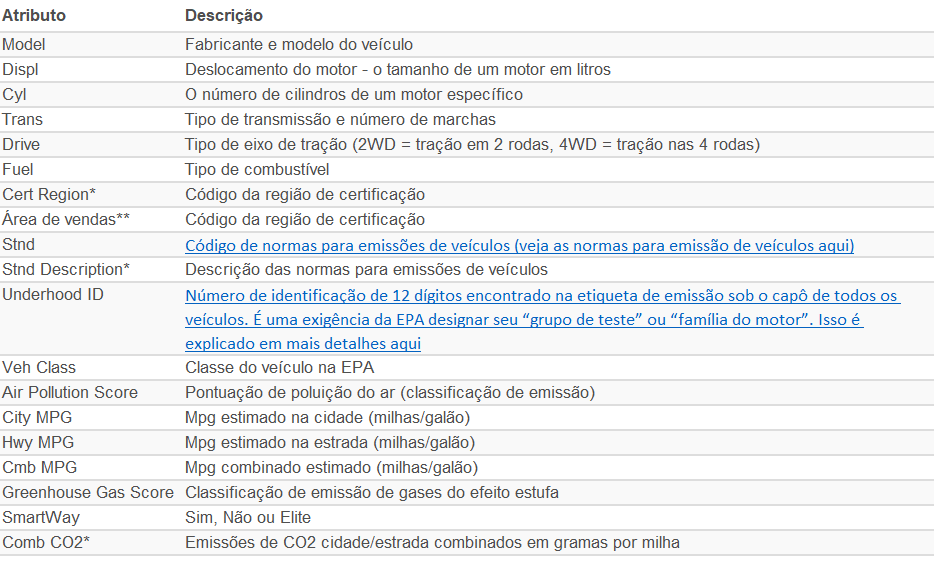

In [246]:
# Importando biblioteca e lendo o Dataset para primeiras impressões
import pandas as pd

df_08 = pd.read_csv('C:/Users/thiagoPanini/Downloads/datasets/all-alpha-08.csv')
df_18 = pd.read_csv('C:/Users/thiagoPanini/Downloads/datasets/all-alpha-18.csv')

In [247]:
# Verificando dataset de 2008
df_08.head()

,Model,Displ,Cyl,Trans,Drive,Fuel,Sales Area,Stnd,Underhood ID,Veh Class,Air Pollution Score,FE Calc Appr,City MPG,Hwy MPG,Cmb MPG,Unadj Cmb MPG,Greenhouse Gas Score,SmartWay
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,CA,U2,8HNXT03.7PKR,SUV,7,Drv,15,20,17,22.0527,4,no
1,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,FA,B5,8HNXT03.7PKR,SUV,6,Drv,15,20,17,22.0527,4,no
2,ACURA RDX,2.3,(4 cyl),Auto-S5,4WD,Gasoline,CA,U2,8HNXT02.3DKR,SUV,7,Drv,17,22,19,24.1745,5,no
3,ACURA RDX,2.3,(4 cyl),Auto-S5,4WD,Gasoline,FA,B5,8HNXT02.3DKR,SUV,6,Drv,17,22,19,24.1745,5,no
4,ACURA RL,3.5,(6 cyl),Auto-S5,4WD,Gasoline,CA,U2,8HNXV03.5HKR,midsize car,7,Drv,16,24,19,24.5629,5,no


In [248]:
# Quantidade de linhas e colunas do dataset de 2008
df_08.shape

(2404, 18)

In [249]:
# Verificando dataset de 2018
df_18.head()

,Model,Displ,Cyl,Trans,Drive,Fuel,Cert Region,Stnd,Stnd Description,Underhood ID,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay,Comb CO2
0,ACURA RDX,3.5,6.0,SemiAuto-6,2WD,Gasoline,FA,T3B125,Federal Tier 3 Bin 125,JHNXT03.5GV3,small SUV,3,20,28,23,5,No,386
1,ACURA RDX,3.5,6.0,SemiAuto-6,2WD,Gasoline,CA,U2,California LEV-II ULEV,JHNXT03.5GV3,small SUV,3,20,28,23,5,No,386
2,ACURA RDX,3.5,6.0,SemiAuto-6,4WD,Gasoline,FA,T3B125,Federal Tier 3 Bin 125,JHNXT03.5GV3,small SUV,3,19,27,22,4,No,402
3,ACURA RDX,3.5,6.0,SemiAuto-6,4WD,Gasoline,CA,U2,California LEV-II ULEV,JHNXT03.5GV3,small SUV,3,19,27,22,4,No,402
4,ACURA TLX,2.4,4.0,AMS-8,2WD,Gasoline,CA,L3ULEV125,California LEV-III ULEV125,JHNXV02.4WH3,small car,3,23,33,27,6,No,330


In [250]:
# Linhas e colunas
df_18.shape

(1611, 18)

### Avaliando dados

1 - Número de amostras em cada conjunto

2 - Número de colunas em cada conjunto

3 - Linhas duplicadas em cada conjunto

4 - Tipos de dados das colunas

5 - Atributos com valor ausente

6 - Número de valores únicos não nulos para atributos em cada conjunto

7 - O que esses valores únicos são e quanto valem cada

In [50]:
# 1 - Número de amostras em cada conjunto
print(f'Número de amostras no estudo de 2008: {df_08.shape[0]}.')
print(f'Número de amostras no estudo de 2018: {df_18.shape[0]}.')

Número de amostras no estudo de 2008: 2404.
Número de amostras no estudo de 2018: 1611.


In [51]:
# 2 - Número de colunas em cada conjunto
print(f'Número de colunas no Dataset de 2008: {df_08.shape[1]}.')
print(f'Número de colunas no Dataset de 2018: {df_18.shape[1]}.')

Número de colunas no Dataset de 2008: 18.
Número de colunas no Dataset de 2018: 18.


In [52]:
# 3 - Linhas duplicadas em cada conjunto
print(f'Linhas duplicadas no conjunto de 2008: {df_08.duplicated().values.sum()}.')
print(f'Linhas duplicadas no conjunto de 2018: {df_18.duplicated().values.sum()}.')

Linhas duplicadas no conjunto de 2008: 25.
Linhas duplicadas no conjunto de 2018: 0.


In [53]:
# 4 - Tipos de dados das colunas
print("Tipos primitidos - Dataset de 2008:")
df_08.dtypes

Tipos primitidos - Dataset de 2008:


Model                    object
Displ                   float64
Cyl                      object
Trans                    object
Drive                    object
Fuel                     object
Sales Area               object
Stnd                     object
Underhood ID             object
Veh Class                object
Air Pollution Score      object
FE Calc Appr             object
City MPG                 object
Hwy MPG                  object
Cmb MPG                  object
Unadj Cmb MPG           float64
Greenhouse Gas Score     object
SmartWay                 object
dtype: object

In [54]:
print('Tipos primitivos - Dataset de 2018: ')
df_18.dtypes

Tipos primitivos - Dataset de 2018: 


Model                    object
Displ                   float64
Cyl                     float64
Trans                    object
Drive                    object
Fuel                     object
Cert Region              object
Stnd                     object
Stnd Description         object
Underhood ID             object
Veh Class                object
Air Pollution Score       int64
City MPG                 object
Hwy MPG                  object
Cmb MPG                  object
Greenhouse Gas Score      int64
SmartWay                 object
Comb CO2                 object
dtype: object

*Comentário:* Há uma grande quantidade de dados numéricos salvos como `str`. Isso precisa ser modificado, porém apenas nos passos futuros.

5 - Atributos com valor ausente

6 - Número de valores únicos não nulos para atributos em cada conjunto

7 - O que esses valores únicos são e quanto valem cada

In [55]:
# 5 - Atributos com valor ausente
print(f'Há {df_08.isnull().sum().max()} valores NaN no conjunto de 2008.')
print(f'Há {df_18.isnull().sum().max()} valores NaN no conjunto de 2018.')

Há 199 valores NaN no conjunto de 2008.
Há 2 valores NaN no conjunto de 2018.


In [56]:
# 6 - Número de valores únicos não nulos para atributos em cada conjunto
print('2008:')
df_08.nunique()

2008:


Model                   436
Displ                    47
Cyl                       8
Trans                    14
Drive                     2
Fuel                      5
Sales Area                3
Stnd                     12
Underhood ID            343
Veh Class                 9
Air Pollution Score      13
FE Calc Appr              2
City MPG                 39
Hwy MPG                  43
Cmb MPG                  38
Unadj Cmb MPG           721
Greenhouse Gas Score     20
SmartWay                  2
dtype: int64

In [57]:
print('2018:')
df_18.nunique()

2018:


Model                   367
Displ                    36
Cyl                       7
Trans                    26
Drive                     2
Fuel                      5
Cert Region               2
Stnd                     19
Stnd Description         19
Underhood ID            230
Veh Class                 9
Air Pollution Score       6
City MPG                 58
Hwy MPG                  62
Cmb MPG                  57
Greenhouse Gas Score     10
SmartWay                  3
Comb CO2                299
dtype: int64

In [58]:
# 7 - O que são esses valores únicos e quanto valem
print('Exemplo 2008: ')
df_08['Veh Class'].value_counts()

Exemplo 2008: 


small car          692
SUV                648
pickup             350
midsize car        276
large car          129
van                129
station wagon      123
minivan             37
special purpose     20
Name: Veh Class, dtype: int64

In [59]:
print('Exemplo 2018: ')
df_18['Fuel'].value_counts()

Exemplo 2018: 


Gasoline                1492
Ethanol/Gas               55
Diesel                    38
Gasoline/Electricity      24
Electricity                2
Name: Fuel, dtype: int64

### Tratando colunas (labels)

Algumas colunas não são úteis para a análise em questão. Dessa forma, vamos elimina-las dos Datasets.

* Do conjunto de dados de 2008: *'Stnd', 'Underhood ID', 'FE Calc Appr', 'Unadj Cmb MPG'*
* Do conjunto de dados de 2018: *'Stnd', 'Stnd Description', 'Underhood ID', 'Comb CO2'*

In [60]:
# Visualizando nomes corretos (2008)
df_08.columns

Index(['Model', 'Displ', 'Cyl', 'Trans', 'Drive', 'Fuel', 'Sales Area', 'Stnd',
       'Underhood ID', 'Veh Class', 'Air Pollution Score', 'FE Calc Appr',
       'City MPG', 'Hwy MPG', 'Cmb MPG', 'Unadj Cmb MPG',
       'Greenhouse Gas Score', 'SmartWay'],
      dtype='object')

In [251]:
# Dropando colunas
df_08.drop(['Stnd', 'Underhood ID', 'FE Calc Appr', 'Unadj Cmb MPG'], axis=1, inplace=True)

In [252]:
# Verificando alterações
df_08.head(1)

,Model,Displ,Cyl,Trans,Drive,Fuel,Sales Area,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,CA,SUV,7,15,20,17,4,no


In [253]:
# Mesmo procedimento para 2018
df_18.drop(['Stnd', 'Stnd Description', 'Underhood ID', 'Comb CO2'], axis=1, inplace=True)
df_18.head(1)

,Model,Displ,Cyl,Trans,Drive,Fuel,Cert Region,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay
0,ACURA RDX,3.5,6.0,SemiAuto-6,2WD,Gasoline,FA,small SUV,3,20,28,23,5,No


Agora, visando uma melhor praticidade com o trabalho nos referidos datasets, vamos renomear as colunas para implementar um padrão. Normalmente, colunas nomeadas com espaço costumam dar problemas em algumas funções. Portanto, vamos renoma-las atribuindo lower case em todas e implemenando _ no lugar de espaço.

Outro ponto: no dataset de 2008, a coluna <b>Sales Area</b> deveria se chamar <b>Cert Region</b>, assim como em 2018. Vamos renomea-la primeiro.

In [254]:
# Renomeando Sales Area do DF de 2008
df_08.rename(columns={'Sales Area':'Cert Region'}, inplace=True)
df_08.head(1)

,Model,Displ,Cyl,Trans,Drive,Fuel,Cert Region,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,CA,SUV,7,15,20,17,4,no


In [255]:
# Verificando se os nomes estão iguais em ambos os DataFrames
df_08.columns == df_18.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

Há duas formas: uma elegante e outra parruda. Apliquemos a alegante, deixando a parruda comentada abaixo.

In [256]:
# Forma elegante
df_08.rename(columns=lambda x: x.strip().lower().replace(' ', '_'), inplace=True)
df_18.rename(columns=lambda x: x.strip().lower().replace(' ', '_'), inplace=True)

In [257]:
# Verificando
df_08.head(1)

,model,displ,cyl,trans,drive,fuel,cert_region,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,CA,SUV,7,15,20,17,4,no


In [258]:
df_18.head(1)

,model,displ,cyl,trans,drive,fuel,cert_region,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA RDX,3.5,6.0,SemiAuto-6,2WD,Gasoline,FA,small SUV,3,20,28,23,5,No


In [259]:
# Colunas iguais?
(df_08.columns == df_18.columns).all()

True

In [70]:
# Jeito parrudo
"""
new_columns_08 = [col.strip().lower().replace(' ', '_') for col in df_08.columns]
new_columns_18 = [col.strip().lower().replace(' ', '_') for col in df_18.columns]

df_08.columns = new_columns_08
df_18.columns = new_columns_18
"""

"\nnew_columns_08 = [col.strip().lower().replace(' ', '_') for col in df_08.columns]\nnew_columns_18 = [col.strip().lower().replace(' ', '_') for col in df_18.columns]\n\ndf_08.columns = new_columns_08\ndf_18.columns = new_columns_18\n"

### Filtrar, remover nulos e duplicados

Se for analisada a coluna 'cert_region', há dados de diversas localidades. Para manter a consistência, só compare carros certificados segundo as normas da Califórnia. Filtre os dois conjuntos usando `query()` para selecionar somente linhas em que “cert_region” é “CA”. Em seguida, descarte as colunas “cert_region”, já que não vão fornecer mais nenhuma informação útil (para termos certeza de que todos os valores são “CA”)

In [260]:
# Filtrando dados da California
df_08 = df_08.query('cert_region == "CA"')
df_18 = df_18.query('cert_region == "CA"')

In [261]:
# Verificando
df_08['cert_region'].unique()

array(['CA'], dtype=object)

In [262]:
df_18['cert_region'].unique()

array(['CA'], dtype=object)

In [263]:
# Removendo nulos
df_08.isnull().sum()

model                    0
displ                    0
cyl                     75
trans                   75
drive                   37
fuel                     0
cert_region              0
veh_class                0
air_pollution_score      0
city_mpg                75
hwy_mpg                 75
cmb_mpg                 75
greenhouse_gas_score    75
smartway                 0
dtype: int64

In [264]:
df_18.isnull().sum()

model                   0
displ                   1
cyl                     1
trans                   0
drive                   0
fuel                    0
cert_region             0
veh_class               0
air_pollution_score     0
city_mpg                0
hwy_mpg                 0
cmb_mpg                 0
greenhouse_gas_score    0
smartway                0
dtype: int64

In [265]:
# Removendo NA
df_08.dropna(inplace=True)
df_18.dropna(inplace=True)

In [266]:
# Verificando
df_08.isnull().values.any()

False

In [267]:
df_18.isnull().values.any()

False

In [268]:
# Revomendo duplicados
df_08.drop_duplicates(inplace=True)
df_18.drop_duplicates(inplace=True)

In [269]:
# Salvando edições em novos arquivos
df_08.to_csv('C:/Users/thiagoPanini/Downloads/datasets/all-alpha-08-edited.csv', index=False)
df_18.to_csv('C:/Users/thiagoPanini/Downloads/datasets/all-alpha-18-edited.csv', index=False)

### Modificando tipos de dados

Como foi visto neste Dataset, muitos dados numéricos estão salvos como `str`. Vamos verificar quais deles encontram-se nesta condição com o objetivo de alinhar os dados nos dois Datasets (2008 e 2018) de modo a proporcionar comparações justas.

In [81]:
# Lendo novamente os arquivos
df_08 = pd.read_csv('C:/Users/thiagoPanini/Downloads/datasets/all-alpha-08-edited.csv')
df_18 = pd.read_csv('C:/Users/thiagoPanini/Downloads/datasets/all-alpha-18-edited.csv')

In [270]:
# Tipos de dados de 2008
df_08.dtypes

model                    object
displ                   float64
cyl                      object
trans                    object
drive                    object
fuel                     object
cert_region              object
veh_class                object
air_pollution_score      object
city_mpg                 object
hwy_mpg                  object
cmb_mpg                  object
greenhouse_gas_score     object
smartway                 object
dtype: object

In [271]:
# Tipos de dados de 2018
df_18.dtypes

model                    object
displ                   float64
cyl                     float64
trans                    object
drive                    object
fuel                     object
cert_region              object
veh_class                object
air_pollution_score       int64
city_mpg                 object
hwy_mpg                  object
cmb_mpg                  object
greenhouse_gas_score      int64
smartway                 object
dtype: object

<b>Tarefas:</b>

<b>Ajustando tipo de dados “cyl.”</b>
* 2008: extrair int da string.
* 2018: transformar float em int.

<b>Ajustar tipo de dados “air_pollution_score”</b>
* 2008: transformar string em float.
* 2018: transformar int em float.

<b>Ajustar tipos de dados “city_mpg”, “hwy_mpg” e “cmb_mpg”</b>
* 2008 e 2018: transformar string em float.

<b>Ajustar tipo de dados “greenhouse_gas_score”</b>
* 2008: transformar float em int.

In [272]:
# Vejamos como estão os dados na coluna 'cyl' do conjunto de 2008
df_08['cyl'].value_counts()

(6 cyl)     409
(4 cyl)     283
(8 cyl)     199
(5 cyl)      48
(12 cyl)     30
(10 cyl)     14
(2 cyl)       2
(16 cyl)      1
Name: cyl, dtype: int64

In [273]:
# Precisamos extrair apenas a string
df_08['cyl'] = df_08['cyl'].str.extract('(\d+)').astype(int)

C:\Users\thiagoPanini\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  


In [274]:
# Verificando
df_08['cyl'].value_counts()

6     409
4     283
8     199
5      48
12     30
10     14
2       2
16      1
Name: cyl, dtype: int64

Fonte: https://stackoverflow.com/questions/35376387/extract-int-from-string-in-pandas

In [275]:
df_18.dtypes

model                    object
displ                   float64
cyl                     float64
trans                    object
drive                    object
fuel                     object
cert_region              object
veh_class                object
air_pollution_score       int64
city_mpg                 object
hwy_mpg                  object
cmb_mpg                  object
greenhouse_gas_score      int64
smartway                 object
dtype: object

In [276]:
df_18['cyl'] = df_18['cyl'].astype(int)
df_18.dtypes

model                    object
displ                   float64
cyl                       int32
trans                    object
drive                    object
fuel                     object
cert_region              object
veh_class                object
air_pollution_score       int64
city_mpg                 object
hwy_mpg                  object
cmb_mpg                  object
greenhouse_gas_score      int64
smartway                 object
dtype: object

<b>Ajustar tipo de dados “air_pollution_score”</b>
* 2008: transformar string em float.
* 2018: transformar int em float.

In [99]:
df_08.dtypes

model                    object
displ                   float64
cyl                       int32
trans                    object
drive                    object
fuel                     object
cert_region              object
veh_class                object
air_pollution_score      object
city_mpg                 object
hwy_mpg                  object
cmb_mpg                  object
greenhouse_gas_score     object
smartway                 object
dtype: object

In [277]:
apc = 'air_pollution_score'
df_08[apc] = df_08[apc].astype(float)

ValueError: could not convert string to float: '6/4'

Um erro aconteceu? Mas que estranho. Aparentemente há dados incoerentes salvos nesta coluna (como por exemplo, o '6/4' mostrado na mensagem de erro).

In [278]:
df_08[apc].value_counts()

6      500
7      398
9.5     80
9        7
6/4      1
Name: air_pollution_score, dtype: int64

A há! Temos um único dado salvo como 6/4. Parece que isso não vai ser tão simples quanto converter o tipo de dados. Segundo o erro abaixo, o valor na linha 582 seria "6/4" - vamos dar uma olhada.

In [279]:
df_08.iloc[582]

model                   MERCEDES-BENZ C300
displ                                    3
cyl                                      6
trans                              Auto-L7
drive                                  2WD
fuel                           ethanol/gas
cert_region                             CA
veh_class                        small car
air_pollution_score                    6/4
city_mpg                             13/18
hwy_mpg                              19/25
cmb_mpg                              15/21
greenhouse_gas_score                   7/6
smartway                                no
Name: 1550, dtype: object

<b>Não é só o nível de poluição do ar!</b>

As colunas mpg e os nível de gases de efeito estufa também parecem ter o mesmo problema - talvez seja por isso que todos eles foram salvos como strings! Segundo [este link](http://www.fueleconomy.gov/feg/findacarhelp.shtml#airPollutionScore), que eu encontrei na documentação em PDF:

    "Se um veículo pode operar com mais de um tipo de combustível, uma estimativa é fornecida para cada tipo de combustível."
    
Ahh.. então todos veículos com mais de um tipo de combustível, ou híbridos, como aquele visto acima (que usa etanol E gás) terão uma string que armazena dois valores - um para cada. Isto é um pouco complicado, então eu vou mostrar como fazê-lo com o conjunto de dados de 2008, para você então tentar fazer o mesmo com o conjunto de dados de 2018.

In [280]:
# Obtendo carros híbridos de 2008
hb_08 = df_08[df_08['fuel'].str.contains('/')]
hb_08

,model,displ,cyl,trans,drive,fuel,cert_region,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
1550,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol/gas,CA,small car,6/4,13/18,19/25,15/21,7/6,no


Será que em 2018 há muitos carros híbridos?

In [281]:
hb_18 = df_18[df_18['fuel'].str.contains('/')]
hb_18[:4]

,model,displ,cyl,trans,drive,fuel,cert_region,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
108,BMW 330e,2.0,4,SemiAuto-8,2WD,Gasoline/Electricity,CA,small car,3,28/66,34/78,30/71,10,Yes
160,BMW 530e,2.0,4,SemiAuto-8,2WD,Gasoline/Electricity,CA,small car,7,27/70,31/75,29/72,10,Elite
162,BMW 530e,2.0,4,SemiAuto-8,4WD,Gasoline/Electricity,CA,small car,7,27/66,31/68,28/67,10,Elite
188,BMW 740e,2.0,4,SemiAuto-8,4WD,Gasoline/Electricity,CA,large car,3,25/62,29/68,27/64,9,Yes


Muito mais!

<b>Splitando</b>:

Vamos pegar cada linha que contém um carro híbrido e dividí-la em duas novas linhas - uma com os valores do primeiro tipo de combustível (valores antes da "/") e outra com os valores do segundo tipo de combustível (valores depois da "/"). Vamos separá-los com dois dataframes!

In [286]:
# Criando duas cópias de cada Dataset - Primeiro com os dados de 2008
df1 = hb_08.copy()
df2 = hb_08.copy()

Neste ponto, df1 e df2 possuem os mesmos dados.

Quais são as colunas que precisam ser separadas? Em outras palavras, precisamos conhecer as colunas que contém "/" nos dados.

In [287]:
df1.head()

,model,displ,cyl,trans,drive,fuel,cert_region,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
1550,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol/gas,CA,small car,6/4,13/18,19/25,15/21,7/6,no


In [283]:
# Lista com colunas split
split_columns = ['fuel', 'air_pollution_score', 'city_mpg', 'hwy_mpg', 'cmb_mpg', 'greenhouse_gas_score']

A ideia é percorrer cada uma dessas colunas e <b>splitar</b> os dados, ou seja, separá-los em cada um dos DataFrames, sendo o primeiro contendo os dados antes da barra e o segundo contendo os dados depois da barra.

In [284]:
# Verificando split
df1['fuel']

1550    ethanol/gas
Name: fuel, dtype: object

In [288]:
df1['fuel'][582]

KeyError: 582

In [289]:
df1['fuel'][582].split('/')

KeyError: 582

In [119]:
print(df1['fuel'][582].split('/')[0])
print(df1['fuel'][582].split('/')[1])

ethanol
gas


O procedimento testado acima precisa ser aplicado em cada coluna cujos dados que contenham "/".

In [291]:
# Separando dados
for c in split_columns:
    df1[c] = df1[c].apply(lambda x: x.split('/')[0]) # Valores ante da barra
    df2[c] = df2[c].apply(lambda x: x.split('/')[1]) # Valores depois da barra

In [292]:
# Verificando
df1

,model,displ,cyl,trans,drive,fuel,cert_region,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
1550,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol,CA,small car,6,13,19,15,7,no


In [293]:
df2

,model,displ,cyl,trans,drive,fuel,cert_region,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
1550,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,gas,CA,small car,4,18,25,21,6,no


Perfeito.

Referência função apply: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.apply.html

In [294]:
# Mesmo procedimento para os dados de 2018
hb_18.head()

,model,displ,cyl,trans,drive,fuel,cert_region,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
108,BMW 330e,2.0,4,SemiAuto-8,2WD,Gasoline/Electricity,CA,small car,3,28/66,34/78,30/71,10,Yes
160,BMW 530e,2.0,4,SemiAuto-8,2WD,Gasoline/Electricity,CA,small car,7,27/70,31/75,29/72,10,Elite
162,BMW 530e,2.0,4,SemiAuto-8,4WD,Gasoline/Electricity,CA,small car,7,27/66,31/68,28/67,10,Elite
188,BMW 740e,2.0,4,SemiAuto-8,4WD,Gasoline/Electricity,CA,large car,3,25/62,29/68,27/64,9,Yes
382,CHEVROLET Impala,3.6,6,SemiAuto-6,2WD,Ethanol/Gas,CA,large car,5,14/18,20/28,16/22,4,No


In [295]:
hb_08.index

Int64Index([1550], dtype='int64')

In [296]:
# Juntando df1 e df2, ou seja, transformando uma linha em duas
df_new_rows = df1.append(df2)
df_new_rows.head()

,model,displ,cyl,trans,drive,fuel,cert_region,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
1550,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,ethanol,CA,small car,6,13,19,15,7,no
1550,MERCEDES-BENZ C300,3.0,6,Auto-L7,2WD,gas,CA,small car,4,18,25,21,6,no


In [297]:
# Verificando dados antes da alteração
df_08.shape

(986, 14)

In [298]:
# Dropando linhas que continham "/" no df_08 original e dando append nos novos dados
df_08.drop(hb_08.index, inplace=True)
df_08 = df_08.append(df_new_rows)
df_08.shape

(987, 14)

Sucesso.

In [299]:
# Repetindo procedimento para os dados de 2018.
df1 = hb_18.copy()
df2 = hb_18.copy()

for c in split_columns:
    df1[c] = df1[c].apply(lambda x: x.split('/')[0])
    df2[c] = df2[c].apply(lambda x: x.split('/')[1])

AttributeError: 'int' object has no attribute 'split'

In [300]:
# Verificando erro
hb_18[:4]

,model,displ,cyl,trans,drive,fuel,cert_region,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
108,BMW 330e,2.0,4,SemiAuto-8,2WD,Gasoline/Electricity,CA,small car,3,28/66,34/78,30/71,10,Yes
160,BMW 530e,2.0,4,SemiAuto-8,2WD,Gasoline/Electricity,CA,small car,7,27/70,31/75,29/72,10,Elite
162,BMW 530e,2.0,4,SemiAuto-8,4WD,Gasoline/Electricity,CA,small car,7,27/66,31/68,28/67,10,Elite
188,BMW 740e,2.0,4,SemiAuto-8,4WD,Gasoline/Electricity,CA,large car,3,25/62,29/68,27/64,9,Yes


In [301]:
split_columns

['fuel',
 'air_pollution_score',
 'city_mpg',
 'hwy_mpg',
 'cmb_mpg',
 'greenhouse_gas_score']

No dataset de 2018, a coluna *greenhouse_gas_score* não possui barras. Modificando lista...

In [302]:
hb_18.head(1)

,model,displ,cyl,trans,drive,fuel,cert_region,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
108,BMW 330e,2.0,4,SemiAuto-8,2WD,Gasoline/Electricity,CA,small car,3,28/66,34/78,30/71,10,Yes


In [303]:
split_columns = ['fuel', 'city_mpg', 'hwy_mpg', 'cmb_mpg']
df1 = hb_18.copy()
df2 = hb_18.copy()
for c in split_columns:
    df1[c] = df1[c].apply(lambda x: x.split('/')[0])
    df2[c] = df2[c].apply(lambda x: x.split('/')[1])

In [304]:
df1.head()

,model,displ,cyl,trans,drive,fuel,cert_region,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
108,BMW 330e,2.0,4,SemiAuto-8,2WD,Gasoline,CA,small car,3,28,34,30,10,Yes
160,BMW 530e,2.0,4,SemiAuto-8,2WD,Gasoline,CA,small car,7,27,31,29,10,Elite
162,BMW 530e,2.0,4,SemiAuto-8,4WD,Gasoline,CA,small car,7,27,31,28,10,Elite
188,BMW 740e,2.0,4,SemiAuto-8,4WD,Gasoline,CA,large car,3,25,29,27,9,Yes
382,CHEVROLET Impala,3.6,6,SemiAuto-6,2WD,Ethanol,CA,large car,5,14,20,16,4,No


In [305]:
df1['cmb_mpg'].str.contains('/').any()

False

In [306]:
df2.head()

,model,displ,cyl,trans,drive,fuel,cert_region,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
108,BMW 330e,2.0,4,SemiAuto-8,2WD,Electricity,CA,small car,3,66,78,71,10,Yes
160,BMW 530e,2.0,4,SemiAuto-8,2WD,Electricity,CA,small car,7,70,75,72,10,Elite
162,BMW 530e,2.0,4,SemiAuto-8,4WD,Electricity,CA,small car,7,66,68,67,10,Elite
188,BMW 740e,2.0,4,SemiAuto-8,4WD,Electricity,CA,large car,3,62,68,64,9,Yes
382,CHEVROLET Impala,3.6,6,SemiAuto-6,2WD,Gas,CA,large car,5,18,28,22,4,No


In [307]:
df18_new_rows = df1.append(df2)

In [308]:
df18_new_rows['cmb_mpg'].str.contains('/').any()

False

In [309]:
# Verificando antes da inserção
df_18.shape

(794, 14)

In [310]:
df_18.drop(hb_18.index, inplace=True)

In [311]:
df_18['city_mpg'].str.contains('/').any()

False

In [312]:
# Inserindo
df_18 = df_18.append(df18_new_rows)
df_18.shape

(832, 14)

In [313]:
# Agora sim podemos converter tranquilamente
apc = 'air_pollution_score'
df_08[apc] = df_08[apc].astype(float)
df_18[apc] = df_18[apc].astype(float)

In [314]:
df_08.dtypes

model                    object
displ                   float64
cyl                       int32
trans                    object
drive                    object
fuel                     object
cert_region              object
veh_class                object
air_pollution_score     float64
city_mpg                 object
hwy_mpg                  object
cmb_mpg                  object
greenhouse_gas_score     object
smartway                 object
dtype: object

In [315]:
df_18.dtypes

model                    object
displ                   float64
cyl                       int32
trans                    object
drive                    object
fuel                     object
cert_region              object
veh_class                object
air_pollution_score     float64
city_mpg                 object
hwy_mpg                  object
cmb_mpg                  object
greenhouse_gas_score      int64
smartway                 object
dtype: object

**Ajustar tipos de dado “city_mpg”, “hwy_mpg” e “cmb_mpg”**

* 2008 e 2018: transformar string em float.

In [316]:
# Ajustando
columns = ['city_mpg', 'hwy_mpg', 'cmb_mpg']
for c in columns:
    df_08[c] = df_08[c].astype(float)
    df_18[c] = df_18[c].astype(float)

In [317]:
df_18.dtypes

model                    object
displ                   float64
cyl                       int32
trans                    object
drive                    object
fuel                     object
cert_region              object
veh_class                object
air_pollution_score     float64
city_mpg                float64
hwy_mpg                 float64
cmb_mpg                 float64
greenhouse_gas_score      int64
smartway                 object
dtype: object

**Ajustar tipo de dado “greenhouse_gas_score”**
* 2008: transformar float em int.

In [318]:
df_08.dtypes

model                    object
displ                   float64
cyl                       int32
trans                    object
drive                    object
fuel                     object
cert_region              object
veh_class                object
air_pollution_score     float64
city_mpg                float64
hwy_mpg                 float64
cmb_mpg                 float64
greenhouse_gas_score     object
smartway                 object
dtype: object

In [319]:
ggc = 'greenhouse_gas_score'
df_08[ggc] = df_08[ggc].astype(int)

In [320]:
df_08.dtypes

model                    object
displ                   float64
cyl                       int32
trans                    object
drive                    object
fuel                     object
cert_region              object
veh_class                object
air_pollution_score     float64
city_mpg                float64
hwy_mpg                 float64
cmb_mpg                 float64
greenhouse_gas_score      int32
smartway                 object
dtype: object

In [321]:
df_18[ggc] = df_18[ggc].astype(int)

In [322]:
# Verificando se os tipos estão iguais
df_08.dtypes == df_18.dtypes

model                   True
displ                   True
cyl                     True
trans                   True
drive                   True
fuel                    True
cert_region             True
veh_class               True
air_pollution_score     True
city_mpg                True
hwy_mpg                 True
cmb_mpg                 True
greenhouse_gas_score    True
smartway                True
dtype: bool

In [323]:
# Salvando alterações
df_08.to_csv('C:/Users/thiagoPanini/Downloads/datasets/all-alpha-08-edited.csv', index=False)
df_18.to_csv('C:/Users/thiagoPanini/Downloads/datasets/all-alpha-18-edited.csv', index=False)

### Exploração gráfica

In [183]:
# Importando pacotes
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline

df_08 = pd.read_csv('C:/Users/thiagoPanini/Downloads/datasets/all-alpha-08-edited.csv')
df_18 = pd.read_csv('C:/Users/thiagoPanini/Downloads/datasets/all-alpha-18-edited.csv')

In [184]:
df_08.head()

,model,displ,cyl,trans,drive,fuel,cert_region,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA MDX,3.7,6,Auto-S5,4WD,Gasoline,CA,SUV,7.0,15.0,20.0,17.0,4,no
1,ACURA RDX,2.3,4,Auto-S5,4WD,Gasoline,CA,SUV,7.0,17.0,22.0,19.0,5,no
2,ACURA RL,3.5,6,Auto-S5,4WD,Gasoline,CA,midsize car,7.0,16.0,24.0,19.0,5,no
3,ACURA TL,3.2,6,Auto-S5,2WD,Gasoline,CA,midsize car,7.0,18.0,26.0,21.0,6,yes
4,ACURA TL,3.5,6,Auto-S5,2WD,Gasoline,CA,midsize car,7.0,17.0,26.0,20.0,6,yes


In [185]:
df_18.head()

,model,displ,cyl,trans,drive,fuel,cert_region,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA RDX,3.5,6,SemiAuto-6,2WD,Gasoline,CA,small SUV,3.0,20.0,28.0,23.0,5,No
1,ACURA RDX,3.5,6,SemiAuto-6,4WD,Gasoline,CA,small SUV,3.0,19.0,27.0,22.0,4,No
2,ACURA TLX,2.4,4,AMS-8,2WD,Gasoline,CA,small car,3.0,23.0,33.0,27.0,6,No
3,ACURA TLX,3.5,6,SemiAuto-9,2WD,Gasoline,CA,small car,3.0,20.0,32.0,24.0,5,No
4,ACURA TLX,3.5,6,SemiAuto-9,4WD,Gasoline,CA,small car,3.0,21.0,30.0,24.0,5,No


Compare as distribuições de classificação de emissão de gases do efeito estufa em 2008 e 2018.

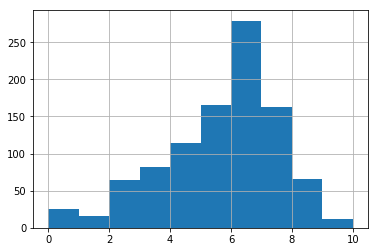

In [193]:
# Fora simples e individual
ggc = 'greenhouse_gas_score'
df_08[ggc].hist();

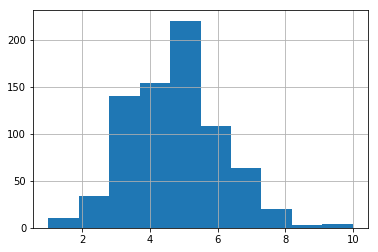

In [194]:
# 2018
df_18[ggc].hist()

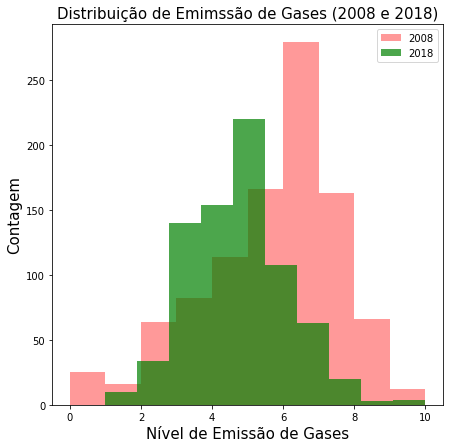

In [203]:
# Analisando separadamente
fig, ax = plt.subplots(figsize=(7, 7))
ax.hist(df_08[ggc], alpha=.4, label='2008', color='r')
ax.hist(df_18[ggc], alpha=.7, label='2018', color='g')
ax.set_xlabel('Nível de Emissão de Gases', fontsize=15)
ax.set_ylabel('Contagem', fontsize=15)
ax.set_title('Distribuição de Emimssão de Gases (2008 e 2018)', fontsize=15)
plt.legend()
plt.show()

Análise: Em 2018 os carros normalmente emitem menos gases relacionados ao Efeito Estufa

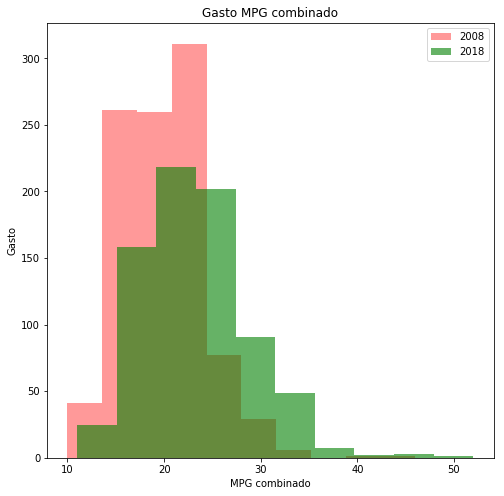

In [207]:
# Gastos mpg médios
fig, ax = plt.subplots(figsize=(8, 8))
ax.hist(df_08['cmb_mpg'], alpha=.4, label='2008', color='r')
ax.hist(df_18['cmb_mpg'], alpha=.6, label='2018', color='g')
ax.set_title('Gasto MPG combinado')
ax.set_xlabel('MPG combinado')
ax.set_ylabel('Gasto')
ax.legend(loc='upper right')
# ax.grid(True)
plt.show()

Análise: Em 2018, carros possuem um menor gasto combinado mpg

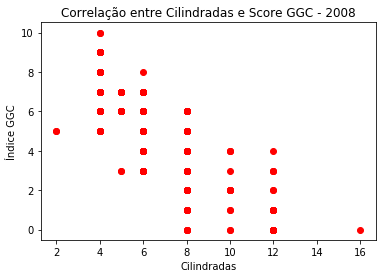

In [209]:
# Correlação entre cilindradas e emissão de gases
plt.scatter(df_08['cyl'], df_08[ggc], color='r');
plt.title('Correlação entre Cilindradas e Score GGC - 2008')
plt.xlabel('Cilindradas')
plt.ylabel('Índice GGC')
plt.show()

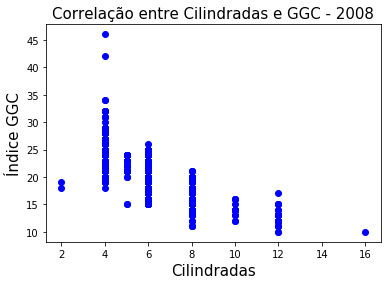

In [213]:
# Correlação entre cilindrada e mpg combinado
x = df_08['cyl']
y = df_08['cmb_mpg']
plt.scatter(x, y, color='b')
plt.title('Correlação entre Cilindradas e GGC - 2008', fontsize=15)
plt.xlabel('Cilindradas', fontsize=15)
plt.ylabel('Índice GGC', fontsize=15)
plt.show()

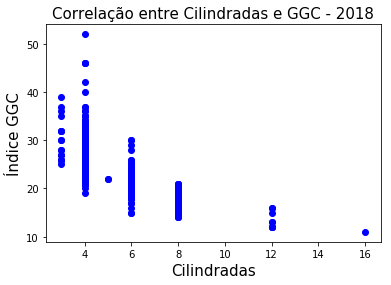

In [214]:
# Correlação entre cilindrada e mpg combinado
x = df_18['cyl']
y = df_18['cmb_mpg']
plt.scatter(x, y, color='b')
plt.title('Correlação entre Cilindradas e GGC - 2018', fontsize=15)
plt.xlabel('Cilindradas', fontsize=15)
plt.ylabel('Índice GGC', fontsize=15)
plt.show()

### Conclusões

Após toda a preparação e exploração dos dados, chega a hora de retirar insights e responder algumas perguntas referentes as informações obtidas:

In [1]:
import pandas as pd

df_08 = pd.read_csv('C:/Users/thiagoPanini/Downloads/datasets/all-alpha-08-edited.csv')
df_18 = pd.read_csv('C:/Users/thiagoPanini/Downloads/datasets/all-alpha-18-edited.csv')

<b>Q1: Existem mais modelos únicos usando fontes alternativas de combustível? Em qual proporção?</b> 

In [326]:
# Funçao para retornar cada proporção de
def calc_fuel_prop(df):
    
    fuels = df['fuel'].unique()
    for fuel in fuels:
        total = df.shape[0]
        print('Combustível: {0} Quantidade: {1:.2f}%'.format(
                fuel, df.query("fuel == @fuel")['fuel'].count()/total))

print("08")
calc_fuel_prop(df_08)
print("18")
calc_fuel_prop(df_18)

08
Combustível: Gasoline Quantidade: 1.00%
Combustível: CNG Quantidade: 0.00%
Combustível: ethanol Quantidade: 0.00%
Combustível: gas Quantidade: 0.00%
18
Combustível: Gasoline Quantidade: 0.90%
Combustível: Diesel Quantidade: 0.02%
Combustível: Ethanol Quantidade: 0.03%
Combustível: Electricity Quantidade: 0.01%
Combustível: Gas Quantidade: 0.03%


<b>Q2: Qual foi o nível de melhoria das classes de veículo no quesito "economia de combustível"?</b>

In [335]:
df_08[df_08['veh_class'] == df_08['veh_class'][0]]['cmb_mpg'].mean()

18.47142857142857

In [343]:
df_08['veh_class'].value_counts()

small car        333
SUV              280
midsize car      138
pickup            83
station wagon     60
large car         55
van               21
minivan           17
Name: veh_class, dtype: int64

In [346]:
df_18['veh_class'].value_counts().index

Index(['small car', 'midsize car', 'small SUV', 'large car', 'standard SUV',
       'pickup', 'station wagon', 'special purpose', 'minivan'],
      dtype='object')

In [ ]:
df_08[df_08['veh_class'] == df_08['veh_class'][0]]['cmb_mpg'].mean()

In [347]:
df_08[df_08['veh_class'].value_counts().index == df_18['veh_class'].value_counts().index]

ValueError: Lengths must match to compare

In [348]:
veh_classes = [classe for classe in df_08['veh_class'].value_counts().index if classe in df_18['veh_class'].value_counts().index]

In [349]:
veh_classes

['small car', 'midsize car', 'pickup', 'station wagon', 'large car', 'minivan']

In [352]:
df_18['veh_class'].value_counts()

small car          285
midsize car        138
small SUV          108
large car           88
standard SUV        86
pickup              78
station wagon       34
special purpose     10
minivan              5
Name: veh_class, dtype: int64

In [353]:
vcl = [classe for classe in df_18['veh_class'].value_counts().index if classe in df_08['veh_class'].value_counts().index]
vcl

['small car', 'midsize car', 'large car', 'pickup', 'station wagon', 'minivan']

In [357]:
df_08v = df_08.query('veh_class == @veh_classes')

In [358]:
df_08.shape

(987, 14)

In [359]:
df_08v.shape

(686, 14)

In [360]:
df_18v = df_18.query('veh_class == @veh_classes')

In [361]:
df_18.shape

(832, 14)

In [362]:
df_18v.shape

(628, 14)

In [374]:
df_08v['veh_class'].unique()[0]

'midsize car'

In [379]:
df_08v.query('veh_class == "midsize car"')['cmb_mpg'].mean()

21.60144927536232

In [380]:
df_18v.query('veh_class == "midsize car"')['cmb_mpg'].mean()

27.884057971014492

In [381]:
for classe in df_08v['veh_class'].unique():
    print(f'Gasto de combustível da classe {classe}: {df_08v.query("veh_class == @classe")["cmb_mpg"].mean():.2f}')
    

Gasto de combustível da classe midsize car: 21.60
Gasto de combustível da classe small car: 21.11
Gasto de combustível da classe station wagon: 22.37
Gasto de combustível da classe large car: 18.51
Gasto de combustível da classe minivan: 19.12
Gasto de combustível da classe pickup: 16.28


In [382]:
for classe in df_18v['veh_class'].unique():
    print(f'Gasto de combustível da classe {classe}: {df_18v.query("veh_class == @classe")["cmb_mpg"].mean():.2f}')

Gasto de combustível da classe small car: 25.42
Gasto de combustível da classe midsize car: 27.88
Gasto de combustível da classe large car: 23.41
Gasto de combustível da classe station wagon: 27.53
Gasto de combustível da classe pickup: 18.59
Gasto de combustível da classe minivan: 20.80


In [389]:
# Calculando aproveitamento final
for classe in df_18v['veh_class'].unique():
    aprov = 100 * (1 - (df_08v.query("veh_class == @classe")["cmb_mpg"].mean() / df_18v.query("veh_class == @classe")["cmb_mpg"].mean()))
    print(f'Variação de {classe}: +{aprov:.2f}%') if aprov > 1 else print(f'Variação de {classe}: -{aprov:.2f}%')


Variação de small car: +16.98%
Variação de midsize car: +22.53%
Variação de large car: +20.93%
Variação de station wagon: +18.75%
Variação de pickup: +12.44%
Variação de minivan: +8.09%


<b>Q3: Quais são as características dos veículos SmartWay? Elas mudaram com o tempo?</b>

In [394]:
df_08.groupby('smartway').describe()

air_pollution_score                                               \
                       count      mean       std  min  25%  50%  75%  max   
smartway                                                                    
no                     607.0  6.293245  0.551479  4.0  6.0  6.0  7.0  9.5   
yes                    380.0  7.365789  1.148195  6.0  7.0  7.0  7.0  9.5   

         city_mpg             ...  greenhouse_gas_score       hwy_mpg  \
            count       mean  ...                   75%   max   count   
smartway                      ...                                       
no          607.0  15.133443  ...                   5.0   7.0   607.0   
yes         380.0  20.984211  ...                   7.0  10.0   380.0   

                                                             
               mean       std   min   25%   50%   75%   max  
smartway                                                     
no        21.299835  3.366852  13.0  19.0  21.0  24.0  28.0  
yes       28.413158  3.075194  22.0  26.0  28.0  30.0  45.0  

[2 rows x 56 columns]

In [395]:
df_18.groupby('smartway').describe()

air_pollution_score                                               \
                       count      mean       std  min  25%  50%  75%  max   
smartway                                                                    
Elite                   17.0  7.000000  0.000000  7.0  7.0  7.0  7.0  7.0   
No                     724.0  3.798343  1.746982  1.0  3.0  3.0  5.0  7.0   
Yes                     91.0  4.879121  1.769087  3.0  3.0  5.0  7.0  7.0   

         city_mpg             ...  greenhouse_gas_score       hwy_mpg  \
            count       mean  ...                   75%   max   count   
smartway                      ...                                       
Elite        17.0  53.235294  ...                  10.0  10.0    17.0   
No          724.0  19.325967  ...                   5.0  10.0   724.0   
Yes          91.0  31.483516  ...                   8.0  10.0    91.0   

                                                              
               mean        std   min   25%   50%   75%   max  
smartway                                                      
Elite     53.117647  21.854297  28.0  33.0  47.0  68.0  99.0  
No        26.708564   5.073390  12.0  23.0  27.0  30.0  61.0  
Yes       39.296703   9.410980  27.0  36.0  37.0  40.0  99.0  

[3 rows x 56 columns]

<b>Q4: Quais características estão associadas à uma maior economia de combustível?</b>

In [396]:
df_08.corr()

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
displ,1.000000,0.899304,-0.289993,-0.790440,-0.801678,-0.818799,-0.847613
cyl,0.899304,1.000000,-0.270417,-0.756304,-0.733064,-0.770538,-0.820940
air_pollution_score,-0.289993,-0.270417,1.000000,0.432434,0.400708,0.425784,0.388444
city_mpg,-0.790440,-0.756304,0.432434,1.000000,0.902942,0.980891,0.910693
hwy_mpg,-0.801678,-0.733064,0.400708,0.902942,1.000000,0.960533,0.931744
cmb_mpg,-0.818799,-0.770538,0.425784,0.980891,0.960533,1.000000,0.947607
greenhouse_gas_score,-0.847613,-0.820940,0.388444,0.910693,0.931744,0.947607,1.000000


In [397]:
df_18.corr()

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
displ,1.000000,0.928189,-0.384986,-0.536748,-0.605202,-0.574880,-0.754193
cyl,0.928189,1.000000,-0.404966,-0.524090,-0.589986,-0.561166,-0.743946
air_pollution_score,-0.384986,-0.404966,1.000000,0.288700,0.309338,0.301150,0.390771
city_mpg,-0.536748,-0.524090,0.288700,1.000000,0.950309,0.992635,0.785513
hwy_mpg,-0.605202,-0.589986,0.309338,0.950309,1.000000,0.978206,0.826981
cmb_mpg,-0.574880,-0.561166,0.301150,0.992635,0.978206,1.000000,0.814982
greenhouse_gas_score,-0.754193,-0.743946,0.390771,0.785513,0.826981,0.814982,1.000000


<b>Q5: Quanto a todos os modelos produzidos em 2008 que ainda estão em produção em 2018, quanto o mpg melhorou e que veículo melhorou mais?</b>

Essa é uma pergunta referente aos modelos que foram atualizados desde 2008 e ainda são produzidos em 2018. Para fazer isso, precisamos de um método para comparar os modelos presentes nos dois conjuntos. Para tanto, vamos aprender sobre combinação.

1. Renomeie as colunas de 2008 para distingui-las das de 2018 após a combinação
Para fazer isso, use rename() no Pandas com uma função lambda. Veja um exemplo aqui. Na função lambda, pegue os 10 primeiros caracteres do rótulo da coluna e concatene-o com “_2008” (só use os 10 primeiros caracteres para evitar colunas com nome gigante).

A função lambda deve ficar mais ou menos assim: “lambda x: x[:10] + "_2008"”

Em “rename”, não esqueça de especificar o parâmetro “columns=” quando for adicionar a função lambda!

2. Executar combinação interna
Para responder à última pergunta, só temos interesse em como o mesmo modelo de carro foi atualizado e como o mpg do novo modelo pode ser comparado ao do modelo antigo.

Execute uma combinação interna com a esquerda em “model_2008” e a direita em “model”. Veja a documentação sobre combinações do Pandas [aqui](https://pandas.pydata.org/pandas-docs/stable/merging.html#database-style-dataframe-joining-merging).

In [2]:
df_08.head()

,model,displ,cyl,trans,drive,fuel,cert_region,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA MDX,3.7,6,Auto-S5,4WD,Gasoline,CA,SUV,7.0,15.0,20.0,17.0,4,no
1,ACURA RDX,2.3,4,Auto-S5,4WD,Gasoline,CA,SUV,7.0,17.0,22.0,19.0,5,no
2,ACURA RL,3.5,6,Auto-S5,4WD,Gasoline,CA,midsize car,7.0,16.0,24.0,19.0,5,no
3,ACURA TL,3.2,6,Auto-S5,2WD,Gasoline,CA,midsize car,7.0,18.0,26.0,21.0,6,yes
4,ACURA TL,3.5,6,Auto-S5,2WD,Gasoline,CA,midsize car,7.0,17.0,26.0,20.0,6,yes


In [3]:
df_18.head()

,model,displ,cyl,trans,drive,fuel,cert_region,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA RDX,3.5,6,SemiAuto-6,2WD,Gasoline,CA,small SUV,3.0,20.0,28.0,23.0,5,No
1,ACURA RDX,3.5,6,SemiAuto-6,4WD,Gasoline,CA,small SUV,3.0,19.0,27.0,22.0,4,No
2,ACURA TLX,2.4,4,AMS-8,2WD,Gasoline,CA,small car,3.0,23.0,33.0,27.0,6,No
3,ACURA TLX,3.5,6,SemiAuto-9,2WD,Gasoline,CA,small car,3.0,20.0,32.0,24.0,5,No
4,ACURA TLX,3.5,6,SemiAuto-9,4WD,Gasoline,CA,small car,3.0,21.0,30.0,24.0,5,No


In [4]:
df_08.head()

,model,displ,cyl,trans,drive,fuel,cert_region,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA MDX,3.7,6,Auto-S5,4WD,Gasoline,CA,SUV,7.0,15.0,20.0,17.0,4,no
1,ACURA RDX,2.3,4,Auto-S5,4WD,Gasoline,CA,SUV,7.0,17.0,22.0,19.0,5,no
2,ACURA RL,3.5,6,Auto-S5,4WD,Gasoline,CA,midsize car,7.0,16.0,24.0,19.0,5,no
3,ACURA TL,3.2,6,Auto-S5,2WD,Gasoline,CA,midsize car,7.0,18.0,26.0,21.0,6,yes
4,ACURA TL,3.5,6,Auto-S5,2WD,Gasoline,CA,midsize car,7.0,17.0,26.0,20.0,6,yes


In [7]:
df_08.rename(columns=lambda x: x[:10] + "_2008", inplace=True)

In [8]:
df_08.head()

,model_2008,displ_2008,cyl_2008,trans_2008,drive_2008,fuel_2008,cert_regio_2008,veh_class_2008,air_pollut_2008,city_mpg_2008,hwy_mpg_2008,cmb_mpg_2008,greenhouse_2008,smartway_2008
0,ACURA MDX,3.7,6,Auto-S5,4WD,Gasoline,CA,SUV,7.0,15.0,20.0,17.0,4,no
1,ACURA RDX,2.3,4,Auto-S5,4WD,Gasoline,CA,SUV,7.0,17.0,22.0,19.0,5,no
2,ACURA RL,3.5,6,Auto-S5,4WD,Gasoline,CA,midsize car,7.0,16.0,24.0,19.0,5,no
3,ACURA TL,3.2,6,Auto-S5,2WD,Gasoline,CA,midsize car,7.0,18.0,26.0,21.0,6,yes
4,ACURA TL,3.5,6,Auto-S5,2WD,Gasoline,CA,midsize car,7.0,17.0,26.0,20.0,6,yes


In [31]:
df_combined = pd.merge(df_08, df_18, on=None, left_on='model_2008', right_on='model', left_index=True, right_index=False)

In [32]:
df_combined.head()

,model_2008,displ_2008,cyl_2008,trans_2008,drive_2008,fuel_2008,cert_regio_2008,veh_class_2008,air_pollut_2008,city_mpg_2008,...,drive,fuel,cert_region,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA RDX,2.3,4,Auto-S5,4WD,Gasoline,CA,SUV,7.0,17.0,...,2WD,Gasoline,CA,small SUV,3.0,20.0,28.0,23.0,5,No
1,ACURA RDX,2.3,4,Auto-S5,4WD,Gasoline,CA,SUV,7.0,17.0,...,4WD,Gasoline,CA,small SUV,3.0,19.0,27.0,22.0,4,No
9,AUDI A3,2.0,4,Man-6,2WD,Gasoline,CA,station wagon,7.0,21.0,...,4WD,Gasoline,CA,small car,7.0,24.0,31.0,27.0,6,No
10,AUDI A3,2.0,4,Man-6,2WD,Gasoline,CA,station wagon,7.0,21.0,...,2WD,Gasoline,CA,small car,7.0,26.0,35.0,29.0,6,No
9,AUDI A3,2.0,4,Auto-S6,2WD,Gasoline,CA,station wagon,7.0,22.0,...,4WD,Gasoline,CA,small car,7.0,24.0,31.0,27.0,6,No


In [23]:
df_combined.columns

Index(['model_2008', 'displ_2008', 'cyl_2008', 'trans_2008', 'drive_2008',
       'fuel_2008', 'cert_regio_2008', 'veh_class_2008', 'air_pollut_2008',
       'city_mpg_2008', 'hwy_mpg_2008', 'cmb_mpg_2008', 'greenhouse_2008',
       'smartway_2008', 'model', 'displ', 'cyl', 'trans', 'drive', 'fuel',
       'cert_region', 'veh_class', 'air_pollution_score', 'city_mpg',
       'hwy_mpg', 'cmb_mpg', 'greenhouse_gas_score', 'smartway'],
      dtype='object')

In [33]:
df_combined.shape

(922, 28)

In [37]:
(df_combined['model_2008'] == df_combined['model']).all()

True

In [56]:
df_combined['model_2008'].unique()

array(['ACURA RDX', 'AUDI A3', 'AUDI A4', 'AUDI A6', 'AUDI A8 L',
       'AUDI Q7', 'AUDI S4', 'AUDI S5', 'AUDI TT Coupe',
       'AUDI TT Roadster', 'BMW 750i', 'BMW Alpina B7',
       'BMW M6 Convertible', 'CADILLAC CTS', 'CADILLAC Escalade',
       'CHEVROLET Corvette', 'CHEVROLET Equinox', 'CHEVROLET Impala',
       'CHEVROLET Malibu', 'CHEVROLET Silverado 15',
       'CHEVROLET Tahoe 1500', 'CHRYSLER 300', 'CHRYSLER Pacifica',
       'DODGE Challenger', 'DODGE Charger', 'DODGE Durango', 'FORD F150',
       'FORD Fusion', 'GMC Acadia', 'GMC Sierra 15', 'GMC Yukon 1500',
       'HONDA Fit', 'HONDA Ridgeline', 'HYUNDAI Elantra',
       'HYUNDAI Santa Fe', 'HYUNDAI Sonata', 'JEEP Compass',
       'JEEP Grand Cherokee', 'KIA Optima', 'KIA Rio', 'KIA Sedona',
       'KIA Sorento', 'KIA Sportage', 'LEXUS LX 570',
       'MASERATI Granturismo', 'MAZDA 3', 'MAZDA CX-9',
       'MERCEDES-BENZ SL550', 'NISSAN Armada', 'NISSAN Versa',
       'PORSCHE 911 Turbo', 'PORSCHE 911 Turbo Cabriolet',

In [73]:
import numpy as np

df_comparison = df_combined.groupby('model_2008').mean().iloc[:, np.r_[5, 12]]

In [81]:
df_comparison['var_08_18'] = 100 * (1 - (df_comparison['cmb_mpg_2008'] / df_comparison['cmb_mpg']))

In [82]:
df_comparison

,cmb_mpg_2008,cmb_mpg,var_08_18
model_2008,,,
ACURA RDX,19.000000,22.500000,15.555556
AUDI A3,23.333333,28.000000,16.666667
AUDI A4,21.000000,27.000000,22.222222
AUDI A6,19.666667,25.666667,23.376623
AUDI A8 L,16.500000,22.000000,25.000000
AUDI Q7,15.000000,21.000000,28.571429
AUDI S4,15.500000,24.000000,35.416667
AUDI S5,16.000000,24.000000,33.333333
AUDI TT Coupe,21.666667,26.000000,16.666667
